In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as mt
from numpy import genfromtxt
from numpy import linalg as LA
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from numpy import ma

from sklearn.ensemble import RandomForestClassifier

import graphviz
from sklearn import tree

In [111]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df = df.loc[:, ' timedelta':]
dfx = df.loc[:, ' timedelta':' abs_title_sentiment_polarity']
dfy = df.loc[:, ' shares']

data = df.as_matrix(columns=None)

data = data[data[:,3]<1]

c = np.array([10,19,43,44,45,47,48,49,52])
for i in c:
    data = data[data[:,i]!=0]

'''
c = np.array([2,6,7,8,9,21,25,26,27,28,29,38,39,40,41,42,46])
for i in c:
    if (LA.norm(data[:,i],0)==data[:,i].shape):
        data[:,i] = np.log(data[:,i])
    else:
        data[:,i] = np.sqrt(data[:,i])
'''
# eliminate unvalid data
#c = np.array([18,20,22,24])
#data = np.delete(data, c, 1)

# pre eliminate unvalid and unuseful features
#c = np.array([12,13,14,15,16,17,18,20,22,24,30,31,32,33,34,35,36,37])
#data = np.delete(data, c, 1)

my_data = np.copy(data)
datax = my_data[:,:my_data.shape[1]-1]
datay = my_data[:,my_data.shape[1]-1]
for j in range(0,datay.shape[0]):
    if datay[j] >1400:
        datay[j] =1
    else:
        datay[j] =0
        
datax_train = datax[:int(datax.shape[0]*3/4),:]
datay_train = datay[:int(datay.shape[0]*3/4)]

datax_test = datax[int(datax.shape[0]*3/4):,:]
datay_test = datay[int(datay.shape[0]*3/4):]

In [114]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(datax_train, datay_train)
clf.score(datax_test,datay_test)

0.64439298709890835

In [116]:
features = dfx.columns
targetnames = ['nonpopular','popular']
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,feature_names=features,class_names=targetnames,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph.render("randomforestwithprepocess")

'randomforestwithprepocess.pdf'

In [107]:
targetnames = ['popular','nonpopular']

In [115]:
clf.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=209652396, splitter='best')

In [125]:
clf.feature_importances_

array([ 0.00227703,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.01935766,  0.14502444,  0.        ,  0.0214695 ,
        0.        ,  0.01899416,  0.        ,  0.00482539,  0.02646022,
        0.09719766,  0.24833905,  0.07744565,  0.03711625,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.07218761,  0.        ,  0.02008698,  0.        ,  0.        ,
        0.11996659,  0.        ,  0.05703874,  0.        ,  0.0024535 ,
        0.        ,  0.        ,  0.02494404,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.00481552,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

In [141]:
vip_features = np.zeros([int(LA.norm(clf.feature_importances_,0)),2])
j=0
for i in range (0,clf.feature_importances_.shape[0]):
    if clf.feature_importances_[i]!=0:
        vip_features[j,0] = i
        vip_features[j,1] = clf.feature_importances_[i]
        j+=1

In [135]:
clf.feature_importances_.shape

(59,)

In [131]:
vip_features = np.zeros([18,2])

In [132]:
vip_features.shape

(18, 2)

In [138]:
clf.feature_importances_.shape[0]

59

In [142]:
vip_features

array([[  0.00000000e+00,   2.27702997e-03],
       [  1.60000000e+01,   1.93576645e-02],
       [  1.70000000e+01,   1.45024439e-01],
       [  1.90000000e+01,   2.14695009e-02],
       [  2.10000000e+01,   1.89941625e-02],
       [  2.30000000e+01,   4.82538553e-03],
       [  2.40000000e+01,   2.64602179e-02],
       [  2.50000000e+01,   9.71976644e-02],
       [  2.60000000e+01,   2.48339050e-01],
       [  2.70000000e+01,   7.74456529e-02],
       [  2.80000000e+01,   3.71162524e-02],
       [  3.50000000e+01,   7.21876142e-02],
       [  3.70000000e+01,   2.00869843e-02],
       [  4.00000000e+01,   1.19966586e-01],
       [  4.20000000e+01,   5.70387373e-02],
       [  4.40000000e+01,   2.45349824e-03],
       [  4.70000000e+01,   2.49440414e-02],
       [  5.30000000e+01,   4.81551869e-03]])

In [161]:
my_data = np.copy(data)
datax = my_data[:,vip_features[:,0].astype(int)]
datay = my_data[:,my_data.shape[1]-1]
for j in range(0,datay.shape[0]):
    if datay[j] >1400:
        datay[j] =1
    else:
        datay[j] =0
        
datax_train = datax[:int(datax.shape[0]*3/4),:]
datay_train = datay[:int(datay.shape[0]*3/4)]

datax_test = datax[int(datax.shape[0]*3/4):,:]
datay_test = datay[int(datay.shape[0]*3/4):]

In [172]:
clf = RandomForestClassifier(max_depth=7, random_state=0)
clf.fit(datax_train, datay_train)
clf.score(datax_test,datay_test)

0.65431690373800855

In [173]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(datax_train, datay_train) # 用逻辑回归拟合数据
lr.score(datax_test, datay_test) # 0.98 在测试集上的平均正确率为0.9

0.49663689491674934

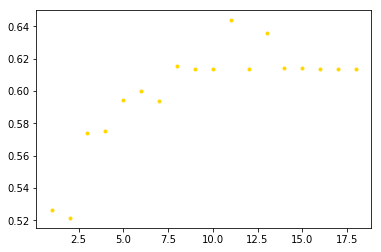

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
myscores = np.zeros(datax_train.shape[1])
for i in range(1,datax_train.shape[1]+1):
    pca = PCA(n_components=i) # 保留2个主成分
    lr = LogisticRegression() # 创建逻辑回归对象
    X_train_pca = pca.fit_transform(datax_train) # 把原始训练集映射到主成分组成的子空间中
    X_test_pca = pca.transform(datax_test) # 把原始测试集映射到主成分组成的子空间中
    lr.fit(X_train_pca, datay_train) # 用逻辑回归拟合数据
    score = lr.score(X_test_pca, datay_test) # 0.98 在测试集上的平均正确率为0.9
    myscores[i-1] = score 
    plt.plot(i,score,'ro',c='gold',markersize = 3)
plt.show()

In [175]:
myscores

array([ 0.52607785,  0.52144669,  0.57415371,  0.57536663,  0.59411181,
        0.59973536,  0.59356048,  0.61572389,  0.61373911,  0.61384938,
        0.64373139,  0.61373911,  0.63557173,  0.61395964,  0.61406991,
        0.61373911,  0.61373911,  0.61384938])